<a href="https://colab.research.google.com/github/J-o-y-y/Fintech_data_analysis/blob/main/BOW%2C_TDM%2CTF_IDF_%EC%8B%A4%EC%8A%B5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단어의 표현(Word Representation)BOW,TDM,TF-IDF (Fininsight) 20231016

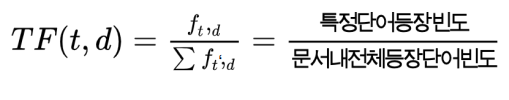

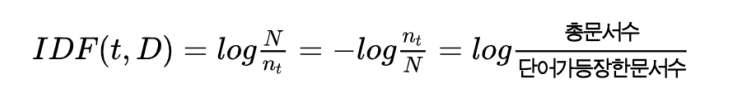

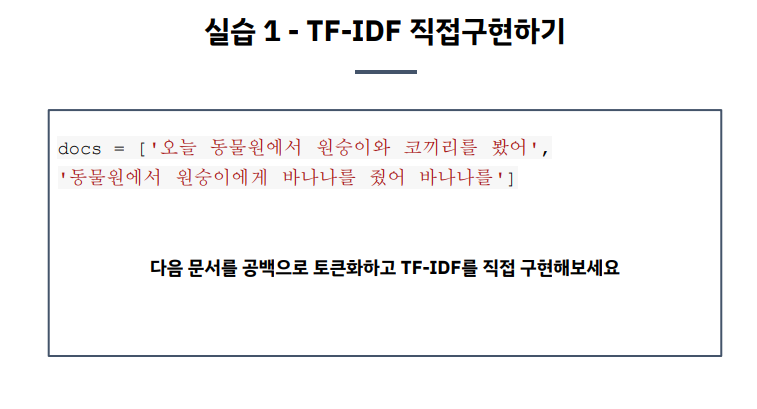

In [ ]:
docs = ['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
 '오늘 동물원에서 원숭이에게 사과를 줬어']

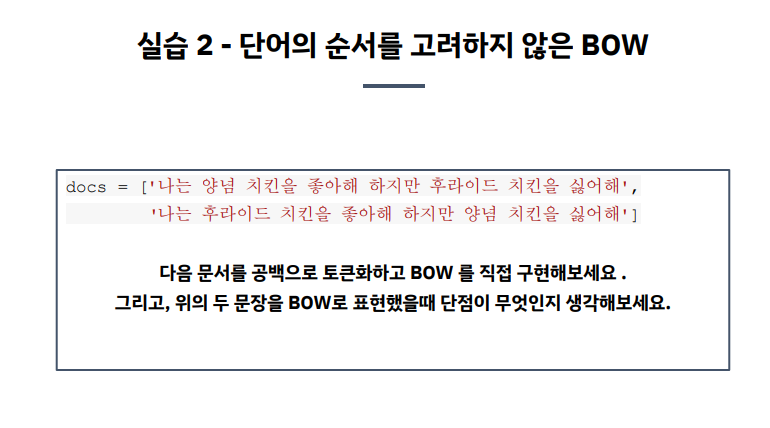

In [6]:
docs = ['나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해',
        '나는 후라이드 치킨을 좋아해 하지만 양념 치킨을 싫어해']

In [8]:
doc_Is = []
for doc in docs:
    doc_Is.append(doc.split(' '))
doc_Is

[['나는', '양념', '치킨을', '좋아해', '하지만', '후라이드', '치킨을', '싫어해'],
 ['나는', '후라이드', '치킨을', '좋아해', '하지만', '양념', '치킨을', '싫어해']]

In [13]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id))
word2id

defaultdict(<function __main__.<lambda>()>, {})

In [14]:
for doc in doc_Is:
  print(doc)
  for token in doc:
    word2id[token]
    print(token)
    print('/t', word2id)

['나는', '양념', '치킨을', '좋아해', '하지만', '후라이드', '치킨을', '싫어해']
나는
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0})
양념
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1})
치킨을
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을': 2})
좋아해
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을': 2, '좋아해': 3})
하지만
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을': 2, '좋아해': 3, '하지만': 4})
후라이드
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을': 2, '좋아해': 3, '하지만': 4, '후라이드': 5})
치킨을
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을': 2, '좋아해': 3, '하지만': 4, '후라이드': 5})
싫어해
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을': 2, '좋아해': 3, '하지만': 4, '후라이드': 5, '싫어해': 6})
['나는', '후라이드', '치킨을', '좋아해', '하지만', '양념', '치킨을', '싫어해']
나는
/t defaultdict(<function <lambda> at 0x794a5a92f5b0>, {'나는': 0, '양념': 1, '치킨을'

In [15]:
word2id

defaultdict(<function __main__.<lambda>()>,
            {'나는': 0,
             '양념': 1,
             '치킨을': 2,
             '좋아해': 3,
             '하지만': 4,
             '후라이드': 5,
             '싫어해': 6})

In [17]:
import numpy as np
BoW_Is = []
for i, doc in enumerate(doc_Is):
  bow = np.zeros(len(word2id), dtype = int)
  print(bow)
  for token in doc:
    bow[word2id[token]] +=1
    print(token,'=>', bow)
  BoW_Is.append(bow.tolist())

[0 0 0 0 0 0 0]
나는 => [1 0 0 0 0 0 0]
양념 => [1 1 0 0 0 0 0]
치킨을 => [1 1 1 0 0 0 0]
좋아해 => [1 1 1 1 0 0 0]
하지만 => [1 1 1 1 1 0 0]
후라이드 => [1 1 1 1 1 1 0]
치킨을 => [1 1 2 1 1 1 0]
싫어해 => [1 1 2 1 1 1 1]
[0 0 0 0 0 0 0]
나는 => [1 0 0 0 0 0 0]
후라이드 => [1 0 0 0 0 1 0]
치킨을 => [1 0 1 0 0 1 0]
좋아해 => [1 0 1 1 0 1 0]
하지만 => [1 0 1 1 1 1 0]
양념 => [1 1 1 1 1 1 0]
치킨을 => [1 1 2 1 1 1 0]
싫어해 => [1 1 2 1 1 1 1]


In [18]:
BoW_Is

[[1, 1, 2, 1, 1, 1, 1], [1, 1, 2, 1, 1, 1, 1]]

In [23]:
from IPython.core import display as ICD
import pandas as pd
sorted_vocab = sorted((value, key) for key, value in word2id.items())
print('sorted_vocab',sorted_vocab)

vocab = []
for v in sorted_vocab:
  vocab.append(v[1])
print('vocab', vocab)
for i in range(len(docs)) :
    print("문서{} : {}".format(i, docs[i]))
    ICD.display(pd.DataFrame([BoW_Is[i]], columns=vocab))
    print("/n/n")

sorted_vocab [(0, '나는'), (1, '양념'), (2, '치킨을'), (3, '좋아해'), (4, '하지만'), (5, '후라이드'), (6, '싫어해')]
vocab ['나는', '양념', '치킨을', '좋아해', '하지만', '후라이드', '싫어해']
문서0 : 나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해


,나는,양념,치킨을,좋아해,하지만,후라이드,싫어해
0,1,1,2,1,1,1,1


/n/n
문서1 : 나는 후라이드 치킨을 좋아해 하지만 양념 치킨을 싫어해


,나는,양념,치킨을,좋아해,하지만,후라이드,싫어해
0,1,1,2,1,1,1,1


/n/n


# 단어의 순서를 고려하지 않은 BOW

In [24]:
docs = ['나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해',
        '나는 후라이드 치킨을 좋ㅇ해 하지만 양념 치킨을 싫어해']
docs

['나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해', '나는 후라이드 치킨을 좋ㅇ해 하지만 양념 치킨을 싫어해']

In [26]:
doc_Is = []
for doc in docs:
  doc_Is.append(doc.split(' '))
doc_Is

[['나는', '양념', '치킨을', '좋아해', '하지만', '후라이드', '치킨을', '싫어해'],
 ['나는', '후라이드', '치킨을', '좋ㅇ해', '하지만', '양념', '치킨을', '싫어해']]

In [27]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id))
for doc in doc_Is:
    for token in doc:
      word2id[token]
word2id

defaultdict(<function __main__.<lambda>()>,
            {'나는': 0,
             '양념': 1,
             '치킨을': 2,
             '좋아해': 3,
             '하지만': 4,
             '후라이드': 5,
             '싫어해': 6,
             '좋ㅇ해': 7})

In [28]:
# dictionary 값 확인
print(word2id['양념'])
print(word2id['치킨을'])

1
2


In [31]:
import numpy as np

BoW_Is =[]
for i, doc in enumerate(doc_Is):
  bow = np.zeros(len(word2id), dtype=int)

  for token in doc:
     bow[word2id[token]] += 1

  BoW_Is.append(bow.tolist())

In [32]:
BoW_Is

[[1, 1, 2, 1, 1, 1, 1, 0], [1, 1, 2, 0, 1, 1, 1, 1]]

In [33]:
import numpy as np

BoW_Is = []
for i, doc in enumerate(doc_Is):
    bow = np.zeros(len(word2id), dtype=int)
    for token in doc:
        bow[word2id[token]] += 1
    BoW_Is.append(bow.tolist())
BoW_Is

[[1, 1, 2, 1, 1, 1, 1, 0], [1, 1, 2, 0, 1, 1, 1, 1]]

# sklearn

CountVectorizer : 토큰빈도계산

In [42]:
docs = ['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
       '오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어 오늘 동물원에서 원숭이에게 사과를 줬어']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

BoW = count_vect.fit_transform(docs)
BoW.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 2, 1, 2, 2, 2]])

In [45]:
from IPython.core import display as ICD

vocab = count_vect.get_feature_names_out()
for i in range(len(docs)) :
    print("문서{} : {}".format(i, docs[i]))
    ICD.display(pd.DataFrame([BoW.toarray()[i]], columns=vocab))
    print("/n/n")

문서0 : 오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어


,동물원에서,먹이를,보고,사과를,오늘,원숭이를,원숭이에게,줬어,코끼리
0,1,1,1,0,1,1,1,1,2


/n/n
문서1 : 오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어 오늘 동물원에서 원숭이에게 사과를 줬어


,동물원에서,먹이를,보고,사과를,오늘,원숭이를,원숭이에게,줬어,코끼리
0,2,1,1,1,2,1,2,2,2


/n/n
